# Lab 09: Relationships between Quantitative Variables

This lab is presented with some revisions from [Dennis Sun at Cal Poly](https://web.calpoly.edu/~dsun09/index.html) and his [Data301 Course](http://users.csc.calpoly.edu/~dsun09/data301/lectures.html)

### When you have filled out all the questions, submit via [Tulane Canvas](https://tulane.instructure.com/)

In this chapter, we discuss ways to summarize and visualize relationships between _quantitative_ variables. To illustrate the concepts, we use the Ames housing data set.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

housing_df = pd.read_csv("./data/ames.tsv", sep="\t")
housing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Visualization

Let's start by visualizing the relationship between the square footage (of the dwelling) and the sale price, both of which are quantitative variables. To do this, we can make a **scatterplot**. In a scatterplot, each observation is represented by a point. The $(x, y)$ coordinates of each point represent the values of two variables for that observation.

To make a scatterplot in `pandas`, we use the `.plot.scatter()` method of `DataFrame`. Since there are multiple columns in the `DataFrame`, we have to specify which variable is $x$ and which variable is $y$.

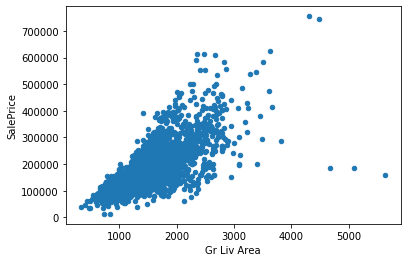

In [2]:
housing_df.plot.scatter(x="Gr Liv Area", y="SalePrice")

We see that square footage (of the dwelling) and the sale price have a positive relationship. That is, the greater the living area, the higher the sale price.

## Summary Statistics

To summarize the relationship between two quantitative variables $X$ and $Y$, we can report the _covariance_ between them, defined as 

$$ \text{Cov}[X, Y] = \frac{1}{n - 1} \sum_x \sum_y (x - \text{mean}[X]) (y - \text{mean}[Y])$$

The sign of the covariance will match the direction of the relationship between the two variables. The figures below illustrate why. If two variables are positively related, then the scatterplot might look as follows, with most points in the upper-right and lower-left quadrants (when you divide up the plane into four quadrants based on the means of $X$ and $Y$).

![](./images/positive_cov.png)

Each point on this scatterplot contributes to the sum that makes up the covariance. Any point in the upper-right quadrant (where $x$ and $y$ are both greater than their respective means) has a positive contribution, since the product of two positive numbers is positive. A point in the lower-left quadrant (where $x$ and $y$ are both less than their respective means) also has a positive contribution, since the product of two negative numbers is also positive. Therefore, on the whole, the covariance will be positive for two variables with a positive relationship.

We can also consider two variables with a negative relationship. A scatterplot of two negatively-related variables might look as follows, with most points in the upper-left and lower-right quadrants. Points in both of these quadrants will have a negative contribution towards the covariance, since the product of a positive and a negative number is negative.

![](./images/negative_cov.png)

What does it mean for the covariance to be _zero_? It does not necessarily mean that there is _no_ relationship at all between the two variables; it just means that the two variables do not move in a consistent direction. For example, the two variables below have _zero_ covariance because the negative contributions from the upper-left and lower-right quadrants perfectly cancel out the positive contributions from the upper-right and lower-left quadrants. However, it would be inaccurate to say that $X$ and $Y$ have _no_ relationship; they have a strong relationship, but it just is not consistently in one direction.

![](./images/zero_cov.png)

To calculate the covariance between two quantitative variables, we use the `.cov()` method in `pandas`. This method is attached to one `Series` and takes another `Series` of the same length as input. It returns the covariance between the two `Series`.

In [3]:
housing_df["Gr Liv Area"].cov(housing_df["SalePrice"])

28542199.568276517

The covariance between the two variables is positive, as should be apparent from the scatterplot above. Larger houses sell for higher prices.

One criticism of the covariance is that the value itself is difficult to interpret, and covariances are not comparable across different variables.  As we did with the $\chi^2$ distance in the previous section, we can normalize the covariance. This _normalized covariance_ is called the **correlation** and is symbolized $r$:

$$ r = \frac{\text{Cov}[X, Y]}{\text{SD}[X] \text{SD}[Y]} $$

Note that formally this is the [Pearson Correlation Coefficient for a population](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), but we can just call it the correlation coefficient for now.

The correlation has all of the important properties of covariance: 

- A positive correlation indicates a positive relationship between the variables. As one increases, so does the other.
- A negative correlation indicates a negative relationship between the variables. As one increases, the other tends to decrease.
- A zero correlation means that the two variables do not move in a consistent direction, but does not necessarily mean that they have _no_ relationship.

But the correlation is also guaranteed to be between $-1$ and $1$, so it can be compared across data sets.

What does a maximal correlation of $\pm 1$ mean? It means that the data fall perfectly along a line.

![](./images/corr_1.png)

Correlation is calculated in `pandas` in much the same way that covariance is, using the `.corr()` method:

In [4]:
housing_df["Gr Liv Area"].corr(housing_df["SalePrice"])

0.7067799209766279

Like the covariance, the correlation $r$ is positive, but it is a number between $-1$ and $+1$. $r=+1$ would mean that all of the points on the scatterplot fell perfectly along a line (with positive slope). Although the points in the scatterplot do not all fall perfectly on a line, they do seem to hover around an underlying line. This explains why the covariance is close to, but not equal to, $1$.

# Three Variables and Beyond
So far in this chapter, we have seen a few ways to summarize and visualize the relationship between two variables. But what if we are working with three or more variables? This section discusses some strategies for dealing with multivariate data.

## Mapping Aesthetics to Variables

In Section 3.3, we made a scatterplot showing the relationship between living area and sale price. What if we also want to understand how number of bedrooms enters into the equation?

One possibility is to make a three-dimensional scatterplot. However, 3D plots are often misleading when represented in two dimensions, and they don't generalize well to even higher dimensions. A better approach is to use other _aesthetics_ of the plot, such as the color or size of the points, to represent additional variables. 

The `.plot.scatter()` function in `pandas` allows us to control four aesthetics of a scatterplot. We've seen two already:

- `x=`: the variable on the $x$-axis
- `y=`: the variable on the $y$-axis

but there are two more:

- `c=`: the colors of the points (either the name of a variable in the `DataFrame` or an array specifying the color of each point)
- `s=`: the sizes of the points (must be an array specifying the size of each point)

For example, to use color to represent the number of bedrooms, we could do the following:

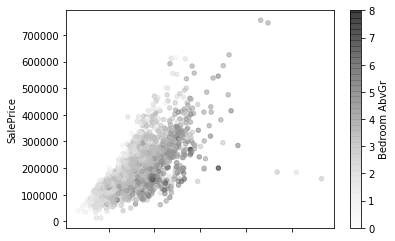

In [5]:
housing_df.plot.scatter(x="Gr Liv Area", y="SalePrice", 
                        c="Bedroom AbvGr", alpha=.5)

Notice how the colors become darker as you move down the plot. This means that, holding living area constant, a house is less expensive the _more_ bedrooms it has. (Why do you think this is?)

Now, number of bedrooms is a quantitative variable. What if we wanted to visualize how a categorical variable, such as building type, interacts with these two quantitative variables (living area and sale price)? We have to manually construct the array of colors using the `.map()` function we learned in Lab 1.

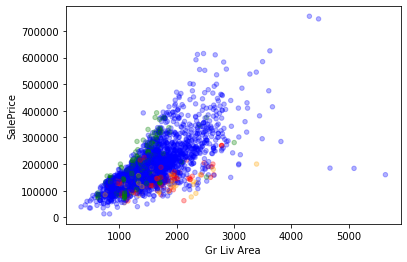

In [6]:
cols = housing_df["Bldg Type"].map({
    "1Fam": "blue",
    "TwnhsE": "green",
    "Twnhs": "green",
    "Duplex": "red",
    "2fmCon": "orange"
})

housing_df.plot.scatter(x="Gr Liv Area", y="SalePrice", 
                        c=cols, alpha=.3)

## Small Multiples

Rather than try to pack all of the variables into a single plot, we can juxtapose several plots or "facets", each showing the data from a slightly different angle. Edward Tufte coined the term "small multiples" for this type of graphic.

For example, rather than use color to represent building type, we could have made 5 separate scatterplots, one for each building type, and arranged them in a row for easy comparison.

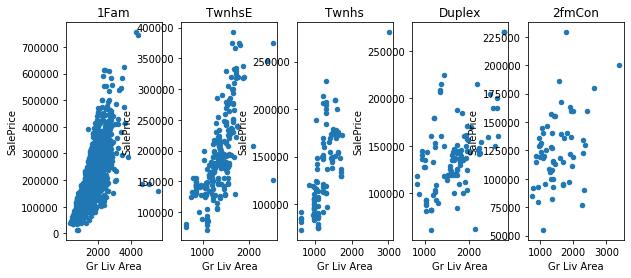

In [7]:
# Specifies a 1 x 5 grid of plots, figsize in inches
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

bldg_types = housing_df["Bldg Type"].unique()
for ax, bldg_type in zip(axes, bldg_types):
    housing_type = housing_df[housing_df["Bldg Type"] == bldg_type]
    housing_type.plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax)
    ax.set_title(bldg_type)

Of course, the goal of such a graphic is to facilitate comparison, which is difficult when the $x$- and $y$-axes of the facets are so different. Since the facets are aligned horizontally, it makes sense to use a common $y$-axis for all of them. We can do this by specifying `sharey=True` in `plt.subplots()`. (There is also a corresponding `sharex=` argument.)

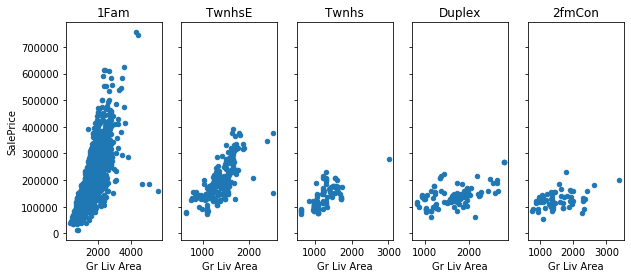

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4), sharey=True)

bldg_types = housing_df["Bldg Type"].unique()
for ax, bldg_type in zip(axes, bldg_types):
    housing_type = housing_df[housing_df["Bldg Type"] == bldg_type]
    housing_type.plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax)
    ax.set_title(bldg_type)

Sharing the $y$-axes between the facets also resolved another issue---the colliding $y$-axis labels---since now only the first plot in the figure has an $y$-axis label.

## Grammar of Graphics

The **grammar of graphics** organizes the ideas above into a coherent philosophy. The key insight is that a graphic can be specified by mapping its "aesthetics" (e.g., color, size, $x$-axis, column facet) to variables in a data set. Although `pandas` provides some support for this philosophy (as we have seen above), the process is tedious and often requires writing boilerplate code. For example, in order to use color to represent building type, we had to manually map each building type to a color. Libraries based on the grammar of graphics provide a more friendly interface and hide this complexity from the user.

Software packages that implement the grammar of graphics include `ggplot2` in R and [Altair](https://altair-viz.github.io/) in Python. Since we are working in Python, we will use Altair. The first step is to import the package.  You will need to install this package on the data science docker image.  If you want go check them out for your final project.  [Seaborn](https://seaborn.pydata.org/) is another package we have discussed which allows for this.

## Summary Statistics

When there are three or more variables, summarizing the relationships can be difficult, so it is usually more fruitful to produce a visualization. That said, there are a few commonly used summary statistics for multivariate data.

The **covariance matrix** is exactly what its name implies; it is a matrix whose $(i, j)$th entry is the correlation between variable $i$ and variable $j$. It is obtained by calling `.cov()` on a `DataFrame`.

In [9]:
variables = ["Gr Liv Area", 
             "Bedroom AbvGr", 
             "Full Bath", 
             "SalePrice"]

housing_df[variables].cov()

,Gr Liv Area,Bedroom AbvGr,Full Bath,SalePrice
Gr Liv Area,2.555392e+05,216.245415,176.184999,2.854220e+07
Bedroom AbvGr,2.162454e+02,0.685139,0.164533,9.516233e+03
Full Bath,1.761850e+02,0.164533,0.305743,2.410074e+04
SalePrice,2.854220e+07,9516.232724,24100.740965,6.381884e+09


Likewise, the **correlation matrix** is just the corresponding matrix of correlations. All of its entries are between $-1$ and $+1$. It is obtained by calling `.corr()` on a `DataFrame`.

In [10]:
housing_df[variables].corr()

,Gr Liv Area,Bedroom AbvGr,Full Bath,SalePrice
Gr Liv Area,1.000000,0.516808,0.630321,0.706780
Bedroom AbvGr,0.516808,1.000000,0.359489,0.143913
Full Bath,0.630321,0.359489,1.000000,0.545604
SalePrice,0.706780,0.143913,0.545604,1.000000


# Exercises

**Exercise 1.** What is the correlation between any variable and itself? Check your answer with any (quantitative) variable from the Ames housing data set.

**Text Answer Here**.
The correlation between any variable and itself is one.

In [11]:
# ENTER YOUR CODE HERE
housing_df["Gr Liv Area"].corr(housing_df["Gr Liv Area"])

1.0

Exercises 2-3 deal with the Tips data set (`./data/tips.csv`).  Write some code below to open this dataset.

In [14]:
# ENTER YOUR CODE HERE
tips_df = pd.read_csv("./data/tips.csv")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Exercise 2.** Make a scatterplot showing the relationship between the tip and the total bill.

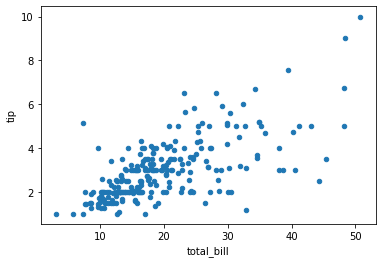

In [15]:
# ENTER YOUR CODE HERE
tips_df.plot.scatter(x = "total_bill", y = "tip")

**Exercise 3.** Which pair of variables in this data set have the highest correlation with each other?

In [18]:
# ENTER YOUR CODE HERE
tips_variables = ["total_bill", "tip", "sex", "smoker", "day", "time", "size"]

tips_df[tips_variables].corr()

#tip and total_bill have the highest correlation (0.6757) if we don't count correlation of variables to themselves.

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


**Exercise 4.** To build your intuition about correlation, play this [correlation guessing game](http://guessthecorrelation.com/). There is even a two-player mode that allows you to play against a friend in the class.  How long did you last?

**Text Answer Here**
I lasted for eleven rounds in the correlation guessing game. The closer the scatter plot was to a straight line, the higher the correlation.

**Exercise 5.** Make a scatterplot (using `pandas` and `matplotlib`) showing the relationship between the tip and the total bill. Use color to indicate whether the tipper was male or female and the size of each point to represent the party size.

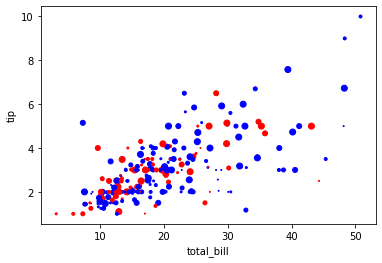

In [29]:
# ENTER YOUR CODE HERE
'''cols = housing_df["Bldg Type"].map({
    "1Fam": "blue",
    "TwnhsE": "green",
    "Twnhs": "green",
    "Duplex": "red",
    "2fmCon": "orange"
})'''
tips_df.head()
sex_colors = tips_df["sex"].map({
    "Male": "blue",
    "Female": "red"
})

size_array = [1,4,9,16,25,36]
tips_df.plot.scatter(x = "total_bill", y = "tip", c = sex_colors, s = size_array)

**Exercise 6.** Calculate the correlation matrix summarizing the pairwise relationships between the quantitative variables in this data set. Interpret what you see.

In [30]:
# ENTER YOUR CODE HERE
tips_df[tips_variables].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


**Answer Text Here...** A question to answer is Why does it make sense that all of the diagonal entries of this matrix are equal to $1.0$?

A variable with have a correlation of one with itself. This is another way of saying "the relationship between a variable and itself is one-to-one."